# **Team 202 Airline Satisfaction Predictive Model**

Edselmo Biondi, Ryan Karim, Keya S. Patel, Sakshi Trivedi

## Problem Introduction and Motivation
The goal is to analyze factors influencing airline customer satisfaction and to predict whether customers would to return or not, which is a critical indicator of service quality and operational efficiency. The dataset provides key details such as flight characteristics, customer demographics, service quality, and satisfaction outcomes. This can be approached through:

- ***Classification:*** Predicting whether a customer is satisfied or not.
- Regression: Estimating a satisfaction score based on various features.

Key features may include:

1. Flight details: Flight distance, delays, etc.

2. Customer demographics: Age, gender, etc.

3. Service-related variables: Cabin service, check-in service, in-flight entertainment, etc.

4. Satisfaction label: A target variable indicating whether a customer was satisfied or not.l be logistic regression and decision trees, as a method of comparison...

This report will be seperated into multiple parts:
1. Exploratory Data Analysis
2. Model 1: Logistic Regression
3. Model 2: Decision Trees vs Random Forest
4. Model 3: Clustering for Targeted Marketing
5. Results Implementation and Summary

**Why it is important?**

Understanding customer satisfaction in the airline industry is critical for several reasons:

- Improving customer experience: By understanding the factors that lead to customer satisfaction or dissatisfaction, airlines can improve their services and enhance the customer experience.

- Increased loyalty and revenue: Satisfied customers are more likely to return for future flights, resulting in higher customer retention and potentially increased revenue from repeat business.

- Operational optimization: Insights into which aspects of service contribute most to dissatisfaction (e.g., long wait times, poor service quality) can lead to operational changes that reduce complaints, reduce costs, and improve operational efficiency.

- Market competitiveness: Airlines with high customer satisfaction tend to perform better in a competitive market, both in terms of customer retention and attracting new customers. Having a predictive model allows airlines to proactively target improvements.



**Key Stakeholders**

Several stakeholders would be involved in the context of this dataset and problem:

1. Customers: The primary stakeholders, as the analysis is ultimately aimed at improving their experience and satisfaction with airline services.

2. Airline Management: Decision-makers within the airline will use insights from the data to make strategic decisions, such as improving services, addressing pain points, and investing in specific areas like customer support or in-flight services.

3. Customer Service and Support Teams: Understanding the key factors of customer dissatisfaction can help train customer service teams to address complaints better and more effectively.

4. Marketing Teams: Customer satisfaction directly impacts marketing strategies. For instance, satisfied customers are more likely to engage in word-of-mouth promotion, while dissatisfied customers may be targeted for retention efforts.

5. Data Scientists/Analysts: Professionals responsible for analyzing the data, building predictive models, and extracting actionable insights from the data.

6. Operational Teams: Insights from the data could help operational teams understand where bottlenecks or service failures are occurring (e.g., in check-in, boarding, or in-flight services) so they can address those areas.

7. Regulatory Bodies: In some cases, government or industry regulators might be interested in the findings, especially if customer satisfaction relates to safety or regulatory compliance.




## Part 1: Exploratory Data Analysis

In [ ]:
#Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Open file dialog to upload CSV file
uploaded = files.upload()

# Load data
df = pd.read_csv(list(uploaded.keys())[0])

df.head()

Saving Airline-Project-Dataset.csv to Airline-Project-Dataset.csv


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
#Check all Variables Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0


In [ ]:
#Check for null values
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [ ]:
#Clean the data by dropping null values
df = df.dropna()
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


In [ ]:
df2=df.copy()
df2.shape

(129487, 24)

In [ ]:
df2.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


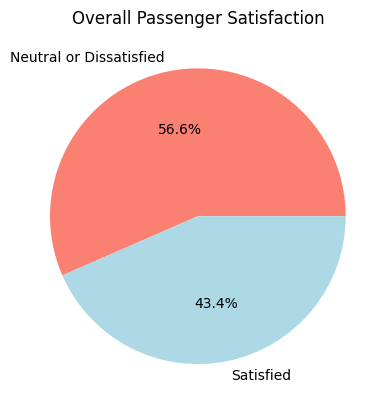

In [ ]:
#Pie chart of Satisfaction
plt.pie(df2['Satisfaction'].value_counts().values, labels = df2['Satisfaction'].value_counts().index, autopct='%1.1f%%', colors=['salmon', 'lightblue'])
plt.title('Overall Passenger Satisfaction');

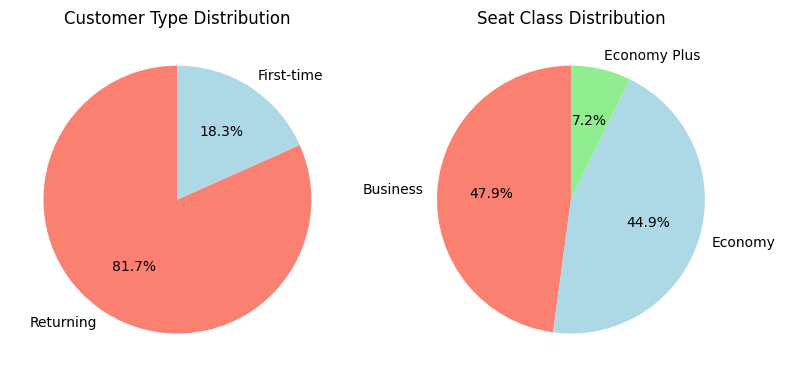

In [ ]:
#Customer Type and Class Pie chart
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Pie chart for Customer Type
customer_type_counts = df['Customer Type'].value_counts()
ax[0].pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90,colors=['salmon', 'lightblue'])
ax[0].set_title('Customer Type Distribution')

# Pie chart for Class
class_counts = df['Class'].value_counts()
ax[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightblue','lightgreen'])
ax[1].set_title('Seat Class Distribution')

plt.tight_layout()
plt.show()

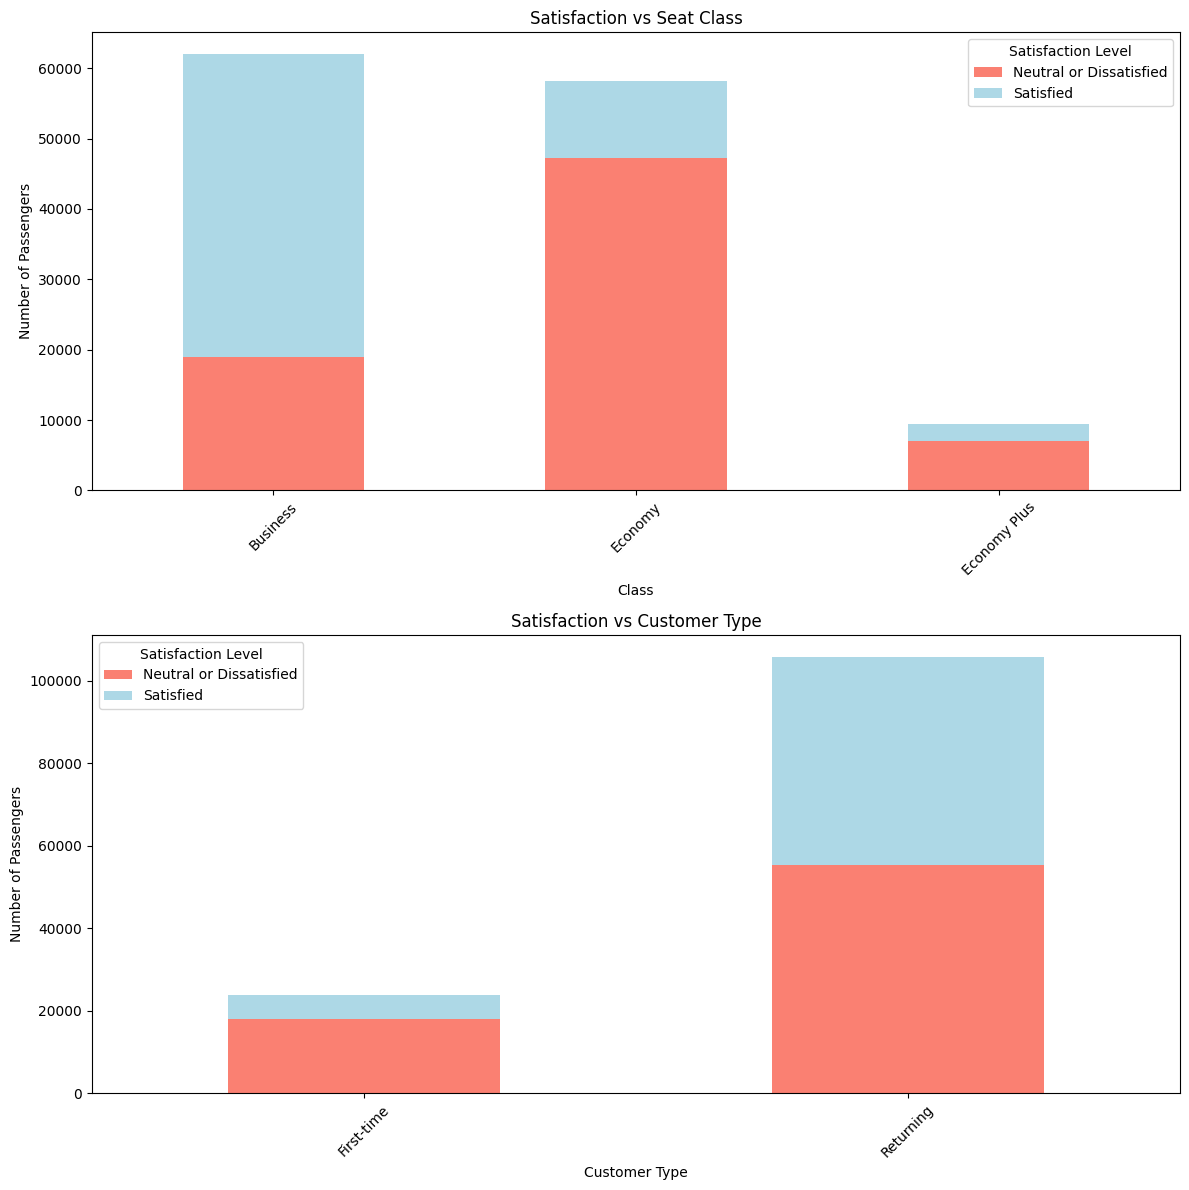

In [ ]:
# Create subplots with updated colors (green for satisfied, red for neutral/dissatisfied)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Satisfaction vs Class bar chart
satisfaction_counts_class = df.groupby(['Class', 'Satisfaction']).size().unstack(fill_value=0)
satisfaction_counts_class.plot(kind='bar', stacked=True, ax=ax[0],  color=['salmon', 'lightblue'])
ax[0].set_title('Satisfaction vs Seat Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Passengers')
ax[0].legend(title='Satisfaction Level')
ax[0].tick_params(axis='x', rotation=45)

# Satisfaction vs Customer Type bar chart
satisfaction_counts_customer_type = df.groupby(['Customer Type', 'Satisfaction']).size().unstack(fill_value=0)
satisfaction_counts_customer_type.plot(kind='bar', stacked=True, ax=ax[1],  color=['salmon', 'lightblue'])
ax[1].set_title('Satisfaction vs Customer Type')
ax[1].set_xlabel('Customer Type')
ax[1].set_ylabel('Number of Passengers')
ax[1].legend(title='Satisfaction Level')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

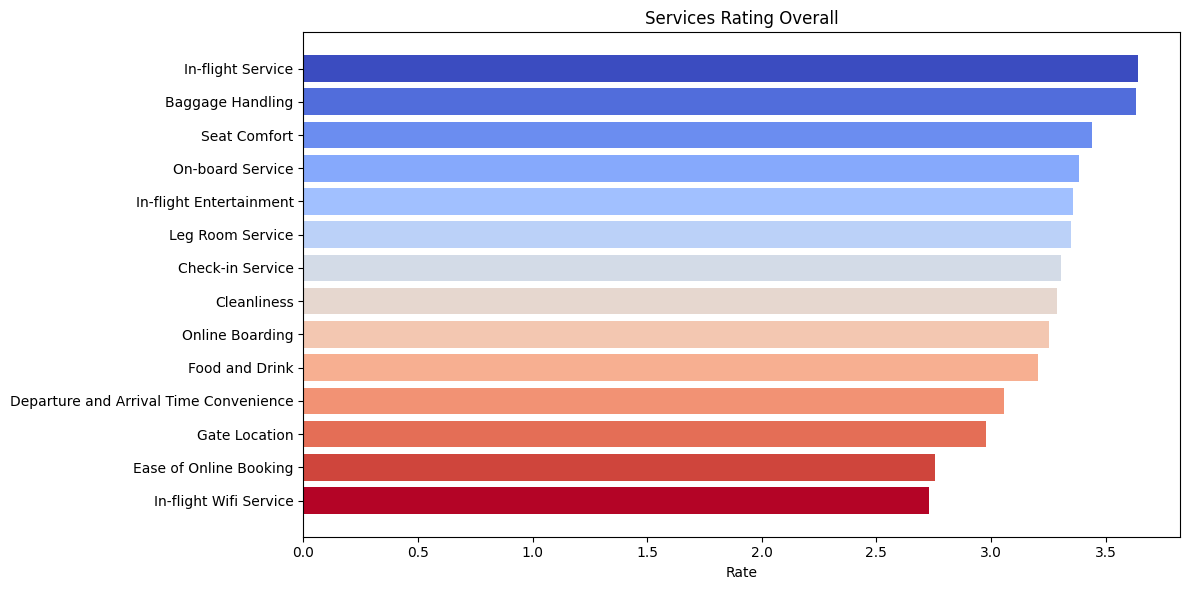

In [ ]:
#Services Rating Overall
df_barchart = df[['Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']]

average_ratings = df_barchart.mean()

# Sort the services by average rating in descending order
average_ratings = average_ratings.sort_values(ascending=False)

# Define color palette from blue to red
colors = plt.cm.coolwarm(np.linspace(0, 1, len(average_ratings)))

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.barh(average_ratings.index, average_ratings, color=colors)
plt.xlabel('Rate')
plt.title('Services Rating Overall')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()

In [ ]:
#One-Hot Encoding for Satisfaction
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
Satisfaction_encoded = onehot_encoder.fit_transform(df2[['Satisfaction']])
df2[onehot_encoder.get_feature_names_out(['Satisfaction'])] = Satisfaction_encoded

In [ ]:
Customer_encode = onehot_encoder.fit_transform(df2[['Customer Type']])
df2[onehot_encoder.get_feature_names_out(['Customer Type'])] = Customer_encode

In [ ]:
#Ordinal Encoder for class

ordinal_encode = OrdinalEncoder(categories=[['Economy', 'Economy Plus', 'Business']])
df2['Class'] = ordinal_encode.fit_transform(df2[['Class']])
df2.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Satisfaction_Satisfied,Customer Type_Returning
0,1,Male,48,First-time,Business,2.0,821,2,5.0,3,...,2,5,5,5,3,5,5,Neutral or Dissatisfied,0.0,0.0
1,2,Female,35,Returning,Business,2.0,821,26,39.0,2,...,5,5,3,5,2,5,5,Satisfied,1.0,1.0
2,3,Male,41,Returning,Business,2.0,853,0,0.0,4,...,3,5,5,3,4,3,3,Satisfied,1.0,1.0
3,4,Male,50,Returning,Business,2.0,1905,0,0.0,2,...,5,4,4,5,2,5,5,Satisfied,1.0,1.0
4,5,Female,49,Returning,Business,2.0,3470,0,1.0,3,...,4,5,4,3,3,3,3,Satisfied,1.0,1.0


<ipython-input-15-d74ca2136bde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='Satisfaction_Satisfied', y='Departure Delay', palette='coolwarm')


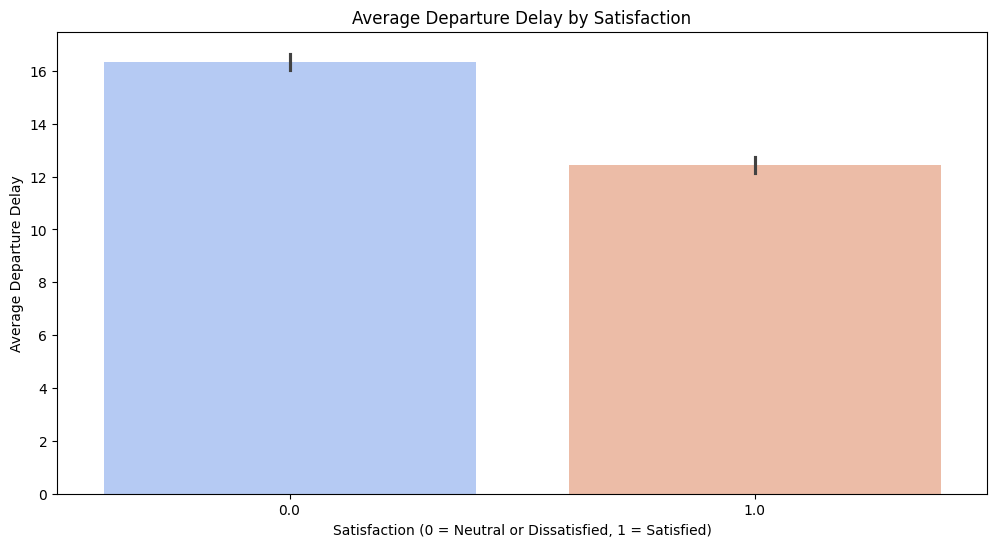

<ipython-input-15-d74ca2136bde>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='Satisfaction_Satisfied', y='Arrival Delay', palette='coolwarm')


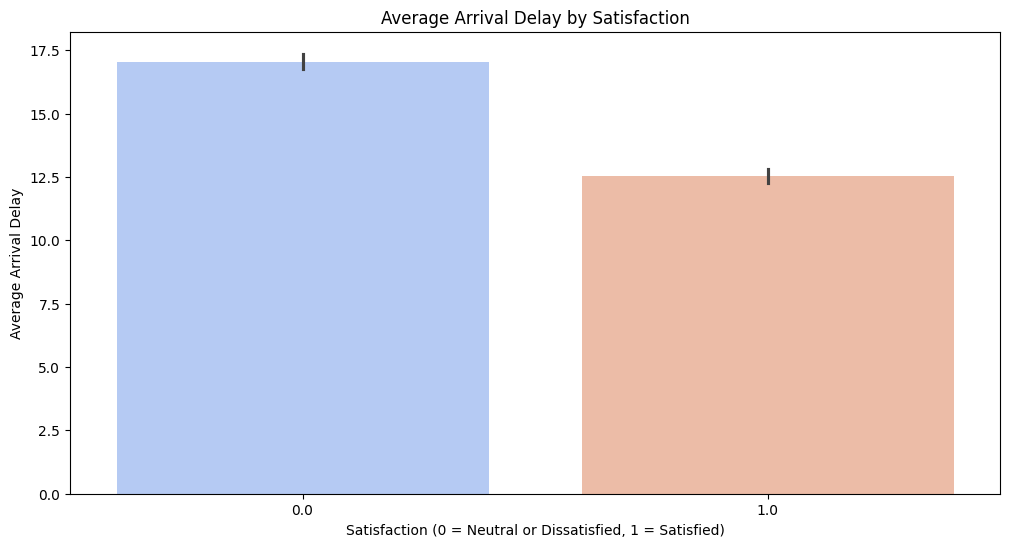

In [ ]:
# Departure and Arrival Delays vs. Satisfaction
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Satisfaction_Satisfied', y='Departure Delay', palette='coolwarm')
plt.title('Average Departure Delay by Satisfaction')
plt.xlabel('Satisfaction (0 = Neutral or Dissatisfied, 1 = Satisfied)')
plt.ylabel('Average Departure Delay')
plt.show();

plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Satisfaction_Satisfied', y='Arrival Delay', palette='coolwarm')
plt.title('Average Arrival Delay by Satisfaction')
plt.xlabel('Satisfaction (0 = Neutral or Dissatisfied, 1 = Satisfied)')
plt.ylabel('Average Arrival Delay')
plt.show();

In [ ]:
df2 = df2.drop(columns=['Gender','Satisfaction','ID','Type of Travel'])

In [ ]:
df2 = df2.drop(columns=['Customer Type'])

In [ ]:
df2['Class'].unique()

array([2., 0., 1.])

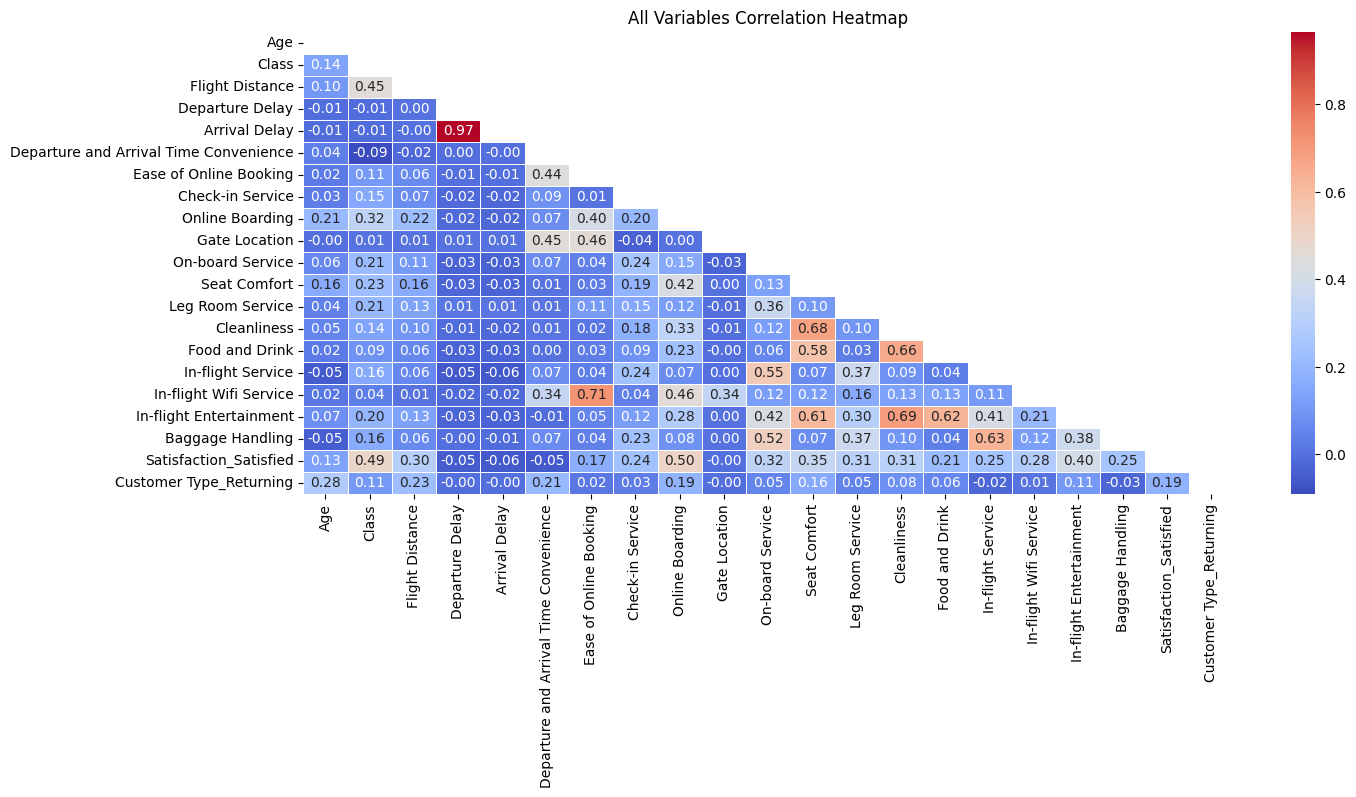

In [ ]:
#df corr (Pearson)
import seaborn as sns
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(method='pearson'),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,mask=np.triu(df2.corr()))
plt.title('All Variables Correlation Heatmap');

In [ ]:
#select wanted features only and target
X = df2[['Class',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Customer Type_Returning']]

y = df2['Satisfaction_Satisfied']

#Scale the Variables
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.23, random_state=42)

## Model 1: Logistic Regression

In [ ]:
#run model, jaccard score
#Train with Logistic Regression
Log = LogisticRegression().fit(X_train, y_train)

#Predict Model
y_pred = Log.predict(X_test)

#Probability Predict
y_pred_prob = Log.predict_proba(X_test)

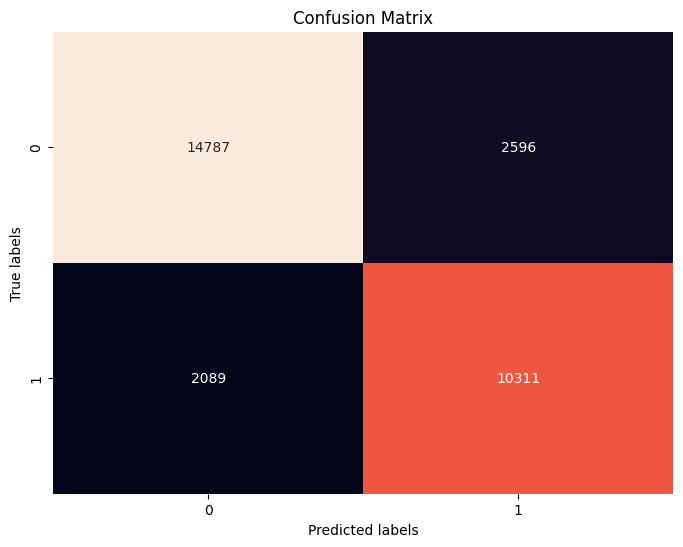

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     17383
         1.0       0.80      0.83      0.81     12400

    accuracy                           0.84     29783
   macro avg       0.84      0.84      0.84     29783
weighted avg       0.84      0.84      0.84     29783

Accuracy Score: 0.84
Precision: 0.80
Recall: 0.83
F1 Score: 0.81
Log Loss: 0.39


In [ ]:
#Logistic Regresiion Evaluation: Confusion matrix, classification_report, accuracy score, Log loss
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)

#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss

report = classification_report (y_pred, y_test)
print(report)

# Calculate Accuracy
accuracy = accuracy_score(y_pred, y_test)

# Calculate Precision
precision = precision_score(y_pred, y_test)

# Calculate Recall
recall = recall_score(y_pred, y_test)

# Calculate F1 Score
f1 = f1_score(y_pred, y_test)

#Calculate Log Loss
log_loss = log_loss(y_test, y_pred_prob)

# Print the scores
print(f'Accuracy Score: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Log Loss: {log_loss:.2f}')

AUC: 0.90


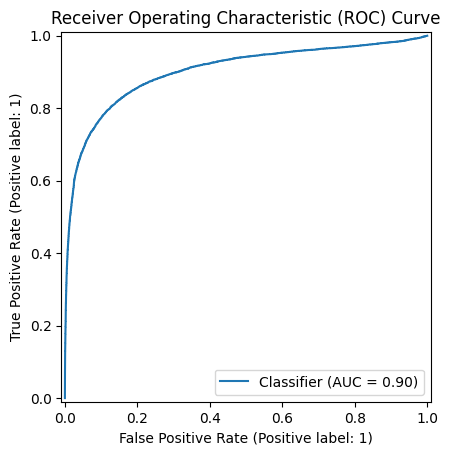

In [ ]:
#ROC Curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score
# Print AUC
auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print(f'AUC: {auc:.2f}')

# Plotting the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_prob[:, 1])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

### Hyperparameter Tuning

    param_C param_solver  mean_test_score
0     0.001    newton-cg         0.844379
1     0.001        lbfgs         0.844409
2     0.001    liblinear         0.843737
3     0.010    newton-cg         0.845282
4     0.010        lbfgs         0.845272
5     0.010    liblinear         0.845252
6     0.100    newton-cg         0.845222
7     0.100        lbfgs         0.845152
8     0.100    liblinear         0.845162
9     1.000    newton-cg         0.845212
10    1.000        lbfgs         0.845202
11    1.000    liblinear         0.845242
12   10.000    newton-cg         0.845232
13   10.000        lbfgs         0.845202
14   10.000    liblinear         0.845242
15  100.000    newton-cg         0.845222
16  100.000        lbfgs         0.845192
17  100.000    liblinear         0.845242


<Figure size 800x500 with 0 Axes>

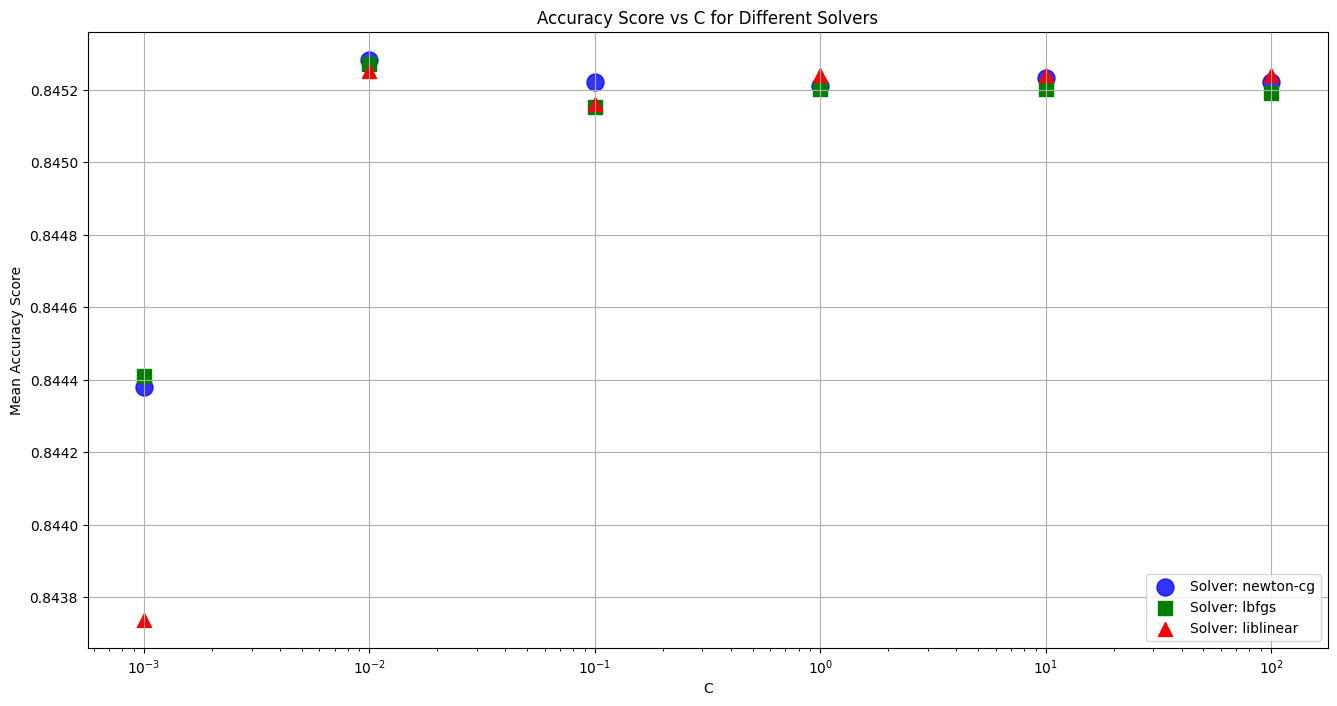

In [ ]:
#Hyperparameter tuning with grid search
from sklearn.model_selection import GridSearchCV

#Define model for logistic regression with fixed max iteration
model = LogisticRegression(max_iter=300)

#Parameter grid
param_grid= { 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

#create grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#After fitting, get the results for all parameter combinations
results = pd.DataFrame(grid_search.cv_results_)

print(results[['param_C', 'param_solver', 'mean_test_score']])

# Extract relevant data for plotting
results_summary = results[['param_C', 'param_solver', 'mean_test_score']]

# Create a plot
plt.figure(figsize=(8, 5))

# Define markers and colors for different solvers
markers = {'newton-cg': 'o', 'lbfgs': 's', 'liblinear': '^'}
colors = {'newton-cg': 'blue', 'lbfgs': 'green', 'liblinear': 'red'}

# Plot Accuracy Score vs C for each solver
plt.figure(figsize=(16, 8))
for solver in param_grid['solver']:
    subset = results_summary[results_summary['param_solver'] == solver]
    marker_size = 150 if solver == 'newton-cg' else 100  # Make 'newton-cg' markers larger
    alpha = 0.8 if solver == 'newton-cg' else 1  # Set transparency for distinction
    plt.scatter(subset['param_C'], subset['mean_test_score'],
                label=f'Solver: {solver}',
                marker=markers[solver],
                color=colors[solver],
                s=marker_size,
                alpha=alpha)

# Add labels and title
plt.xlabel('C')
plt.ylabel('Mean Accuracy Score')
plt.xscale('log')
plt.title('Accuracy Score vs C for Different Solvers')
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()


Best Parameters: {'C': 0.01, 'solver': 'newton-cg'}
Best Estimators: LogisticRegression(C=0.01, max_iter=300, solver='newton-cg')
Best Score: 0.8452820328494635
AUC: 0.90


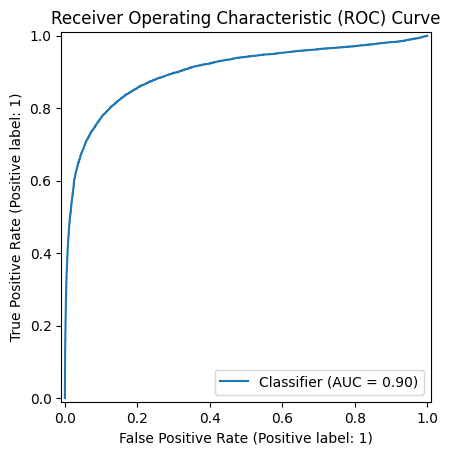

In [ ]:
#Print the best parameters and estimators
print("Best Parameters:", grid_search.best_params_)
print("Best Estimators:", grid_search.best_estimator_)
print("Best Score:", grid_search.best_score_)

# Train the logistic regression model with the best parameters
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Print AUC
print(f'AUC: {auc:.2f}')

# Plotting the ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

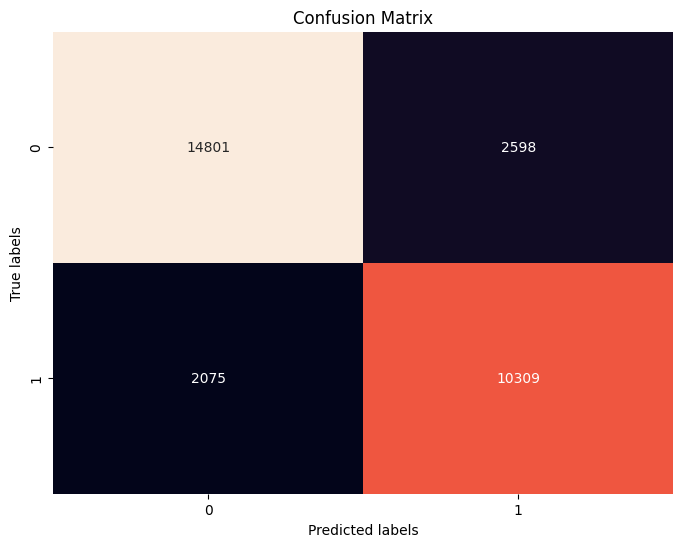

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     17399
         1.0       0.80      0.83      0.82     12384

    accuracy                           0.84     29783
   macro avg       0.84      0.84      0.84     29783
weighted avg       0.84      0.84      0.84     29783

Accuracy: 0.84
Precision: 0.80
Recall: 0.83
F1 Score: 0.82
Log Loss: 0.39


In [ ]:
#Predict Model
y_pred = best_model.predict(X_test)
y_pred_prob2 = best_model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix

#Confusion Matrix function
cm = confusion_matrix(y_pred, y_test)

#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#Scikit-learn Evaluation Functions for Logistic Regression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss

report = classification_report (y_pred, y_test)
print(report)

# Calculate Accuracy
accuracy = accuracy_score(y_pred, y_test)

# Calculate Precision
precision = precision_score(y_pred, y_test)

# Calculate Recall
recall = recall_score(y_pred, y_test)

# Calculate F1 Score
f1 = f1_score(y_pred, y_test)

#Calculate Log Loss
log_loss2 = log_loss(y_test, y_pred_prob2)

# Print the scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Log Loss: {log_loss2:.2f}')

## Model 2: Decision Tree VS Random Forest

### Decision Tree Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

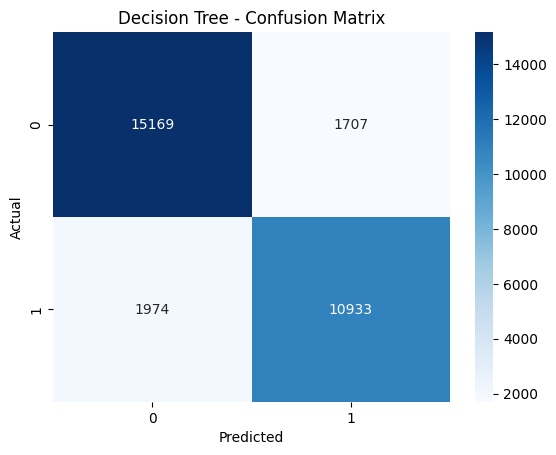

Accuracy: 0.88
Precision: 0.85
Recall: 0.86
F1 Score: 0.86


In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=3)
dt_model.fit(X_train, y_train)

# Predict using the trained Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation for Decision Tree

# Plot confusion matrix for Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(y_pred_dt, y_test)

# Calculate Precision
precision = precision_score(y_pred_dt, y_test)

# Calculate Recall
recall = recall_score(y_pred_dt, y_test)

# Calculate F1 Score
f1 = f1_score(y_pred_dt, y_test)

# Print the scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

In [ ]:
# Visualize the decision tree
feature_names = ['Class',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Customer Type_Returning']

plt.figure(figsize=(14, 8),dpi=1000)
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=['Unsatisfied', 'Satisfied'], rounded=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

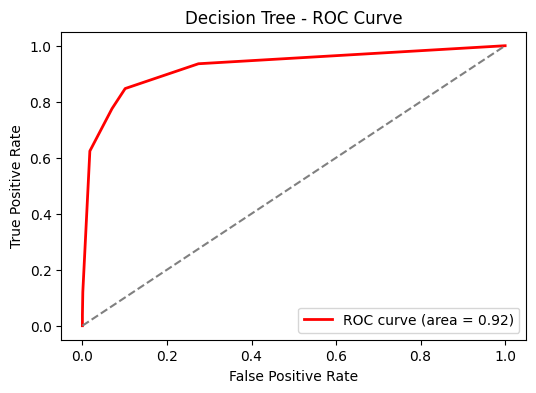

In [ ]:
from sklearn.metrics import roc_curve, auc
# Get the predicted probabilities for the positive class (class 1)
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Hyperparameter Tuning - Decision Trees

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Best Cross-Validation Score: 0.93


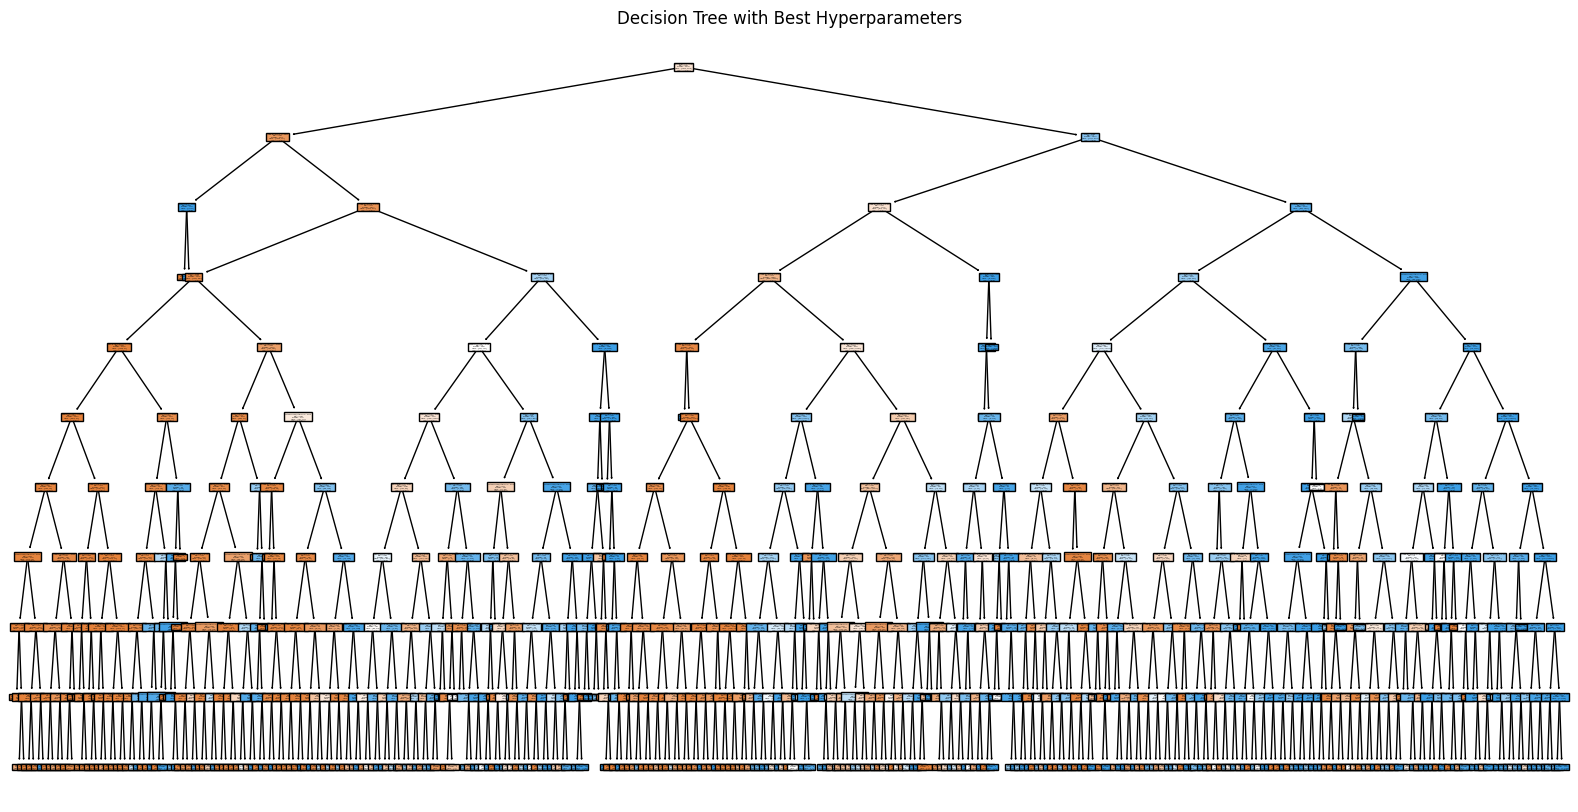

In [ ]:
#Hyperparameter tuning using Grid Search with Cross-Validation
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter':['best']
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

# Create a decision tree with the best parameters
prepruning_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
prepruning_dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot as needed
plot_tree(prepruning_dt, filled=True, feature_names=feature_names, class_names=['Unsatisfied', 'Satisfied'])
plt.title("Decision Tree with Best Hyperparameters")
plt.show()

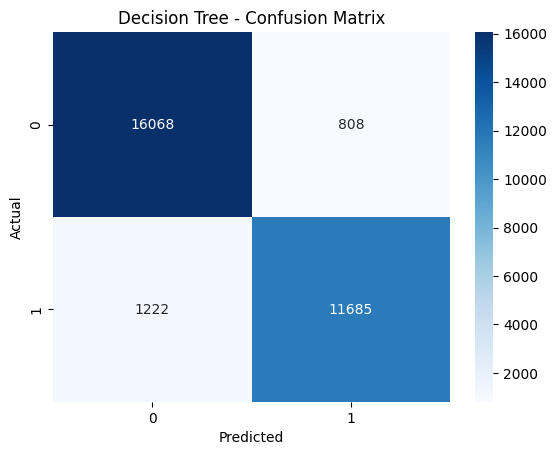

Accuracy: 0.93
Precision: 0.91
Recall: 0.94
F1 Score: 0.92


In [ ]:
# Predict using the trained Decision Tree model
y_pred_dt2 = prepruning_dt.predict(X_test)

# Model Evaluation for Decision Tree

# Plot confusion matrix for Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt2), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(y_pred_dt2, y_test)

# Calculate Precision
precision = precision_score(y_pred_dt2, y_test)

# Calculate Recall
recall = recall_score(y_pred_dt2, y_test)

# Calculate F1 Score
f1 = f1_score(y_pred_dt2, y_test)

# Print the scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

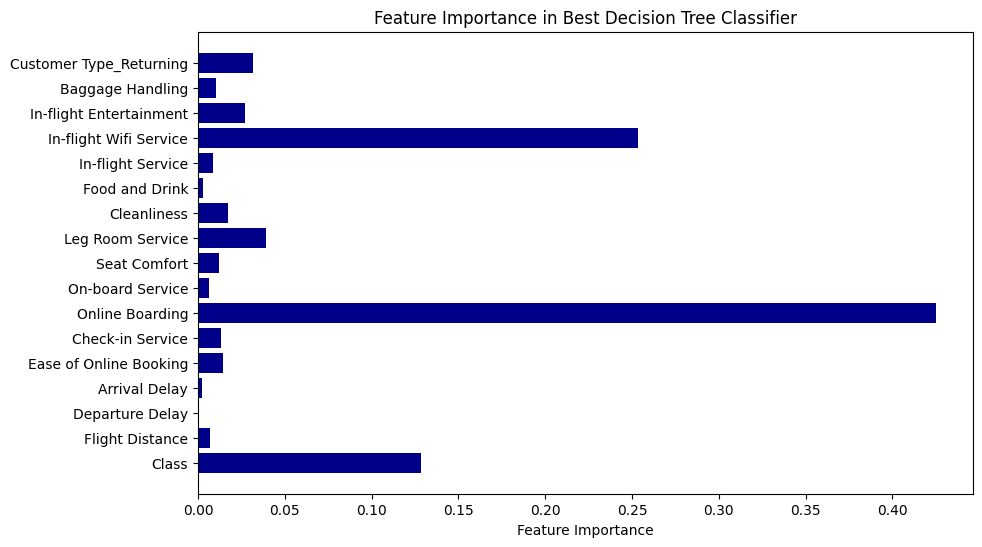

In [ ]:
# Plot feature importance for the best model
# Define color palette from blue to red


feature_importance_best = prepruning_dt.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_best, color='darkblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Best Decision Tree Classifier')
plt.show()

### Random Forest Classifier


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     16876
         1.0       0.95      0.93      0.94     12907

    accuracy                           0.95     29783
   macro avg       0.95      0.95      0.95     29783
weighted avg       0.95      0.95      0.95     29783



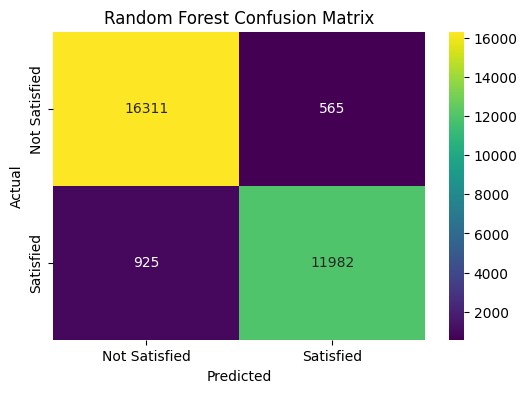

Accuracy: 0.95
Precision: 0.93
Recall: 0.95
F1 Score: 0.94


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(max_depth=None, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Classification Report:\n", report_rf)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='viridis', xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(y_pred_rf, y_test)

# Calculate Precision
precision = precision_score(y_pred_rf, y_test)

# Calculate Recall
recall = recall_score(y_pred_rf, y_test)

# Calculate F1 Score
f1 = f1_score(y_pred_rf, y_test)

# Print the scores
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

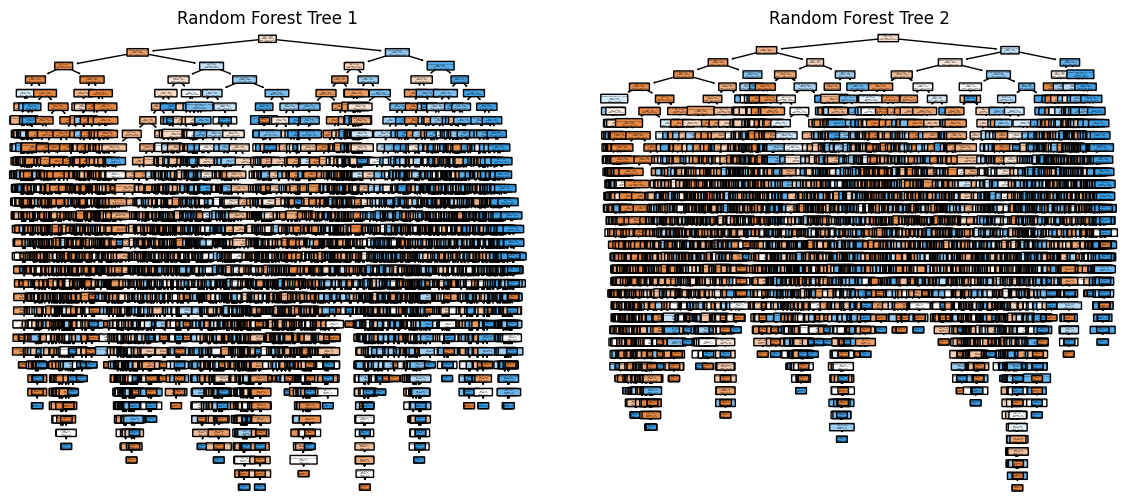

In [ ]:
#Plotting the tree
num_trees_to_plot = 2
fig, axes = plt.subplots(nrows=1, ncols=num_trees_to_plot, figsize=(14, 6), dpi=100)

for i in range(num_trees_to_plot):
    plot_tree(rf_model.estimators_[i], filled=True, feature_names=feature_names, class_names=['No', 'Yes'], rounded=True, ax=axes[i])
    axes[i].set_title(f"Random Forest Tree {i+1}")

plt.show()

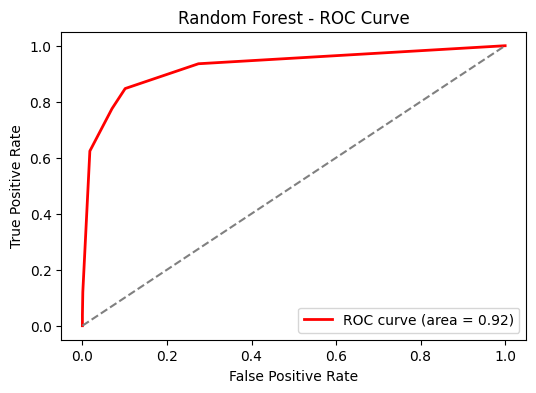

In [ ]:
# Get the predicted probabilities for the positive class (class 1)
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_dt_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

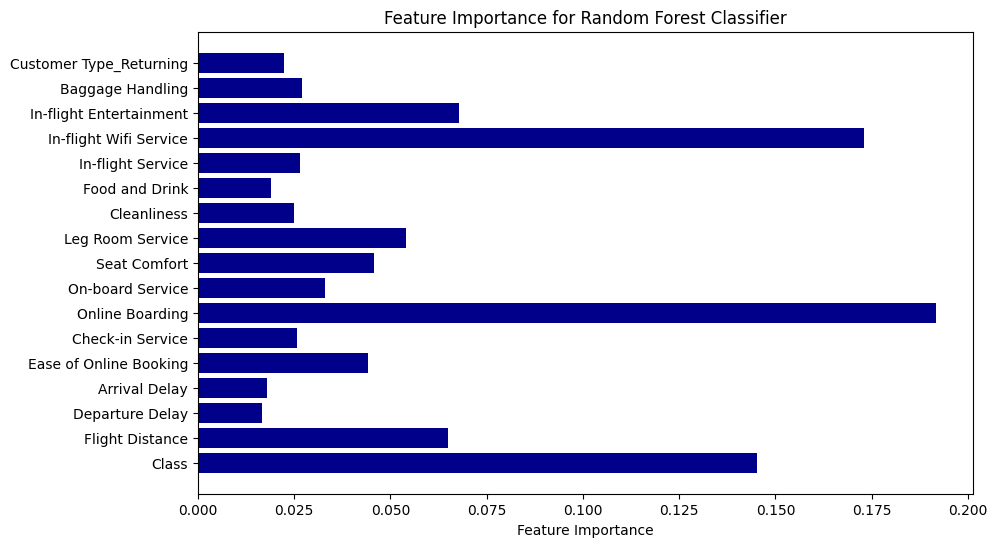

In [ ]:
# Plot feature importance for the best model
# Define color palette from blue to red


feature_importance_best = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_best, color='darkblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

## Model 3: Clustering for Marketing

In [ ]:
#One-Hot Encoding for Satisfaction
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
Satisfaction_encoded = onehot_encoder.fit_transform(df[['Satisfaction']])
df[onehot_encoder.get_feature_names_out(['Satisfaction'])] = Satisfaction_encoded

ordinal_encode = OrdinalEncoder(categories=[['Economy', 'Economy Plus', 'Business']])
df['Class'] = ordinal_encode.fit_transform(df[['Class']])
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Satisfaction_Satisfied
0,1,Male,48,First-time,Business,2.0,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,0.0
1,2,Female,35,Returning,Business,2.0,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,1.0
2,3,Male,41,Returning,Business,2.0,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,1.0
3,4,Male,50,Returning,Business,2.0,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,1.0
4,5,Female,49,Returning,Business,2.0,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,1.0


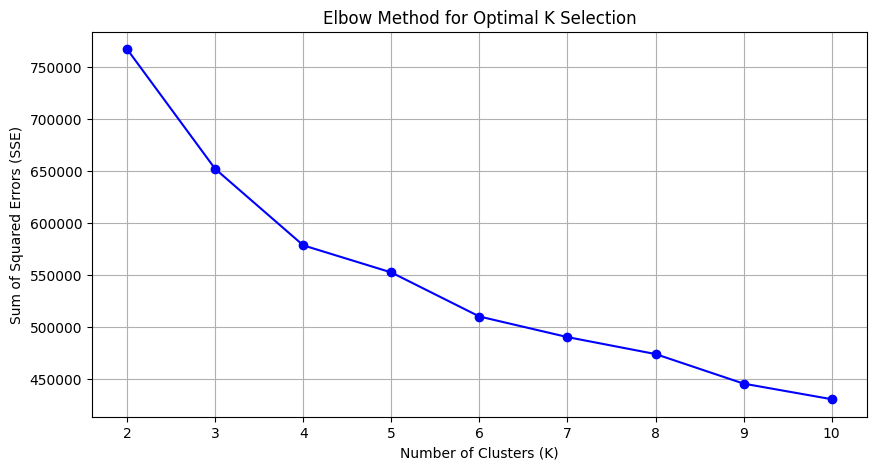

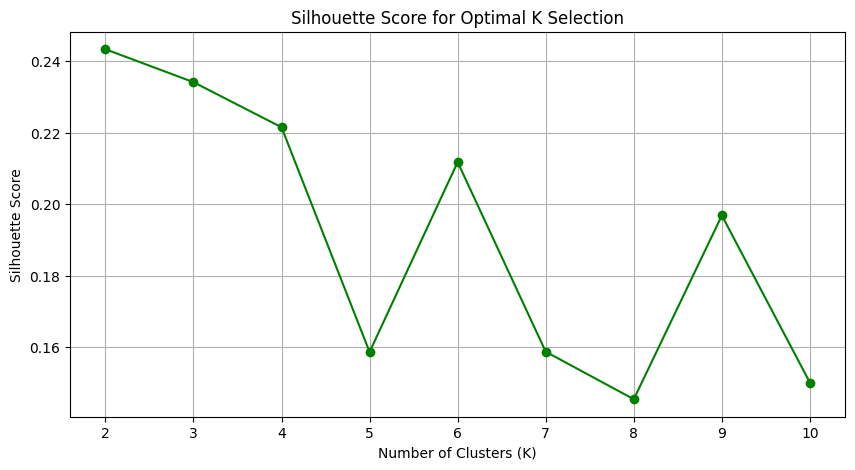

In [ ]:
#Import Python Library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering, with df
features = df[['Age', 'Class', 'Online Boarding', 'Seat Comfort', 'Cleanliness', 'In-flight Service',
               'In-flight Entertainment', 'Baggage Handling']]

# Drop any rows with missing values in selected features
features = features.dropna()

#Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Elbow Method
sse=[]
silhouette_scores=[]
k_range = range(2,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

#plotting Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K Selection')
plt.grid(True)
plt.show()

#Plotting Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K Selection')
plt.grid(True)
plt.show()


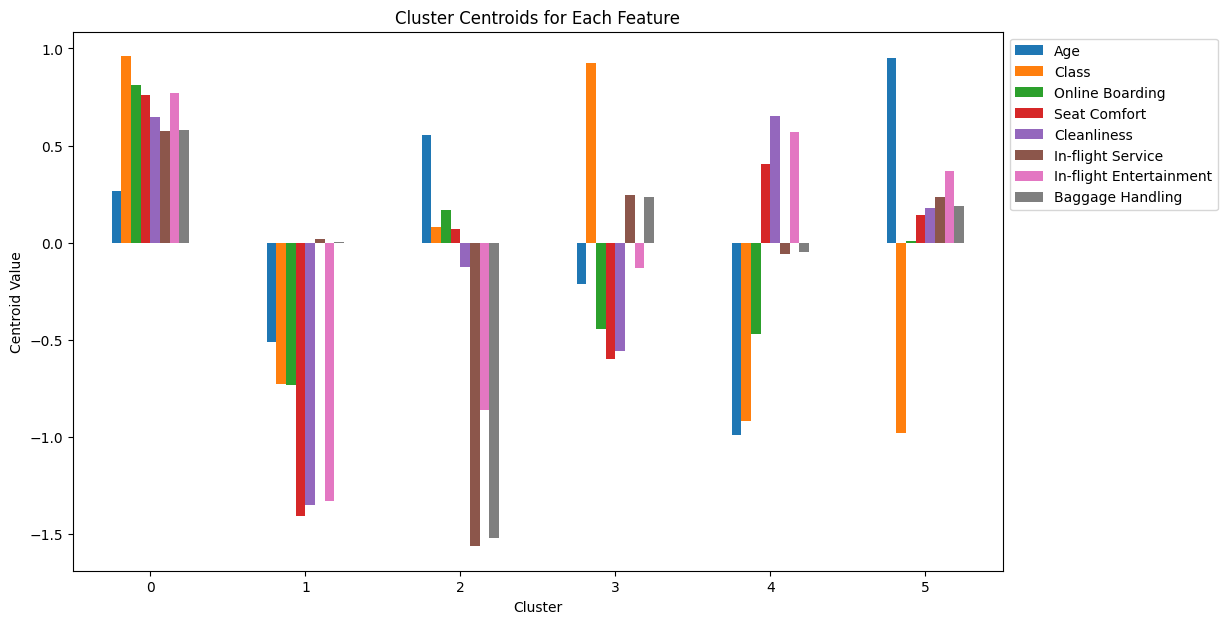

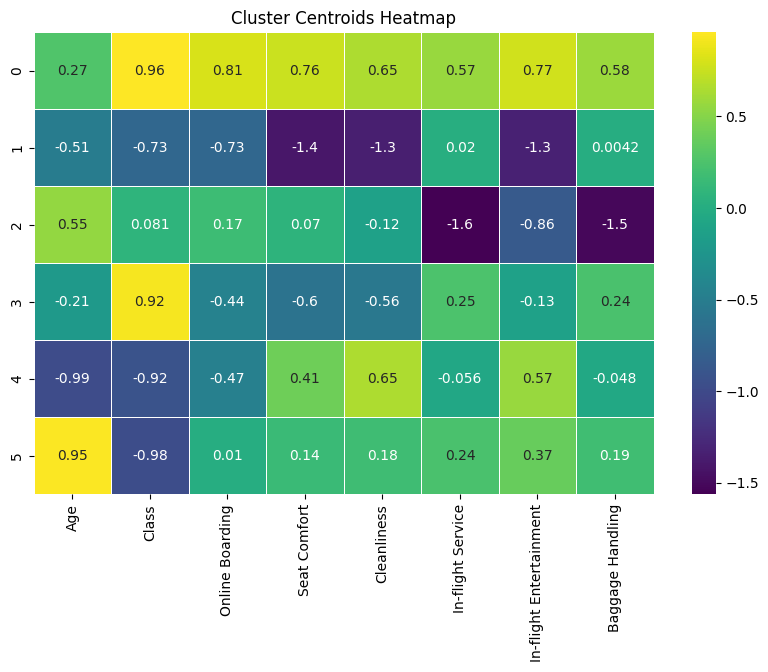

In [ ]:
#Cluster Centroids for Marketing Selection
#KMeans Clustering based on the Optimal K
best_k = 6
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

#Display Centroid Information
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=features.columns)

#Plot the centroids for each feature
centroid_df.plot(kind='bar', figsize=(12, 7))
plt.title('Cluster Centroids for Each Feature')
plt.xlabel('Cluster')
plt.ylabel('Centroid Value')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

# Visualizing Centroid Information using Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(centroid_df, annot=True, cmap='viridis', cbar=True, linewidths=0.5)
plt.title('Cluster Centroids Heatmap')
plt.show()

**Cluster Results:**

**1. Cluster 0: High-End Business Flyers**

- Age: Slightly above average.
- Class: Highest centroid for class, indicating a majority of customers are flying Business class.
- Features: All above average.
- Marketing Strategy: Customers in this cluster tend to fly Business class and value comfort and cleanliness, with positive feedback for in-flight services.
Marketing could focus on luxury upgrades, loyalty programs, and enhanced Business services like extra amenities or premium food options.

**2. Cluster 1: Passengers in Economy**

- Age and Class: Below average, likely indicating younger individuals flying in Economy or Economy Plus.
- Features: All well below average.
- Marketing Strategy: This cluster might include younger or cost-conscious travelers with lower satisfaction for comfort and services.
Marketing could focus on affordable add-ons to improve comfort, such as seat upgrades or affordable meal packages to enhance overall satisfaction.

**3. Cluster 2: Mixed Representation**
- Age: Slightly above average.
- Class: Mixed class, slightly above average.
- Seat Comfort, Cleanliness, In-flight Service: Slightly below average.
- In-flight Entertainment, Baggage Handling: Well below average.
- Marketing or Improvement Strategy: This cluster likely represents passengers flying Economy/Economy Plus, who appreciate value but are slightly dissatisfied with amenities.
Marketing could focus on promotional bundles that improve value, such as better in-flight entertainment packages or better WiFi quality and discounts.

**4. Cluster 3: Business Class with a Focus on Efficiency**

- Age: Slightly below average.
- Class: High representation of Business class travelers.
- Online Boarding: Below average.
- Cleanliness and In-flight Entertainment: Slightly above average.
- Marketing and Improvement Strategy: Business travelers who value cleanliness and in-flight entertainment but are not as satisfied with online boarding.
Marketing could focus on streamlined check-in services or enhanced airport experiences, including priority boarding and lounge access.

**5. Cluster 4: Young Travelers with Service Appreciation**

- Age: Lower than average.
- Class: Primarily Economy or Economy Plus.
- Cleanliness and In-flight Service: Above average.
- Marketing Strategy: This group of younger travelers values cleanliness and in-flight service despite preferring Economy class.
Marketing can be targeted towards youth-oriented programs, such as student discounts or first-time traveler perks, with a focus on maintaining service quality.

**6. Cluster 5: Older, Budget-Conscious Travelers**

- Age: Older, possibly the oldest among all clusters.
- Class: Primarily Economy class, as indicated by the negative centroid value.
- Features: Average to slightly above average values.
- Marketing or Improvement Strategy: This cluster likely represents older travelers, likely retirees, who prefer Economy class but value certain in-flight amenities such as service quality, entertainment, and baggage handling.
Marketing could focus on offer comfort-enhancing options like extra legroom for Economy class. Promote free senior-friendly services, such as assistance during boarding or priority seating.







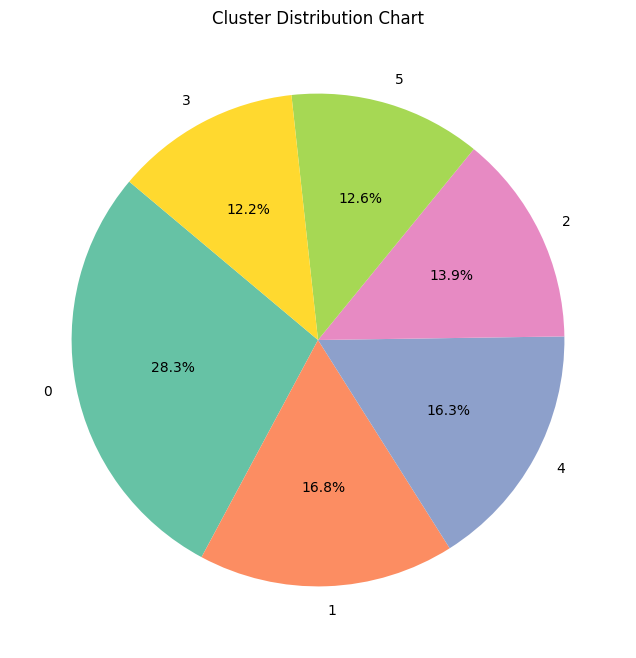

In [ ]:
# Cluster Distribution with Pie Chart
cluster_counts = df['Cluster'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Cluster Distribution Chart')
plt.show()

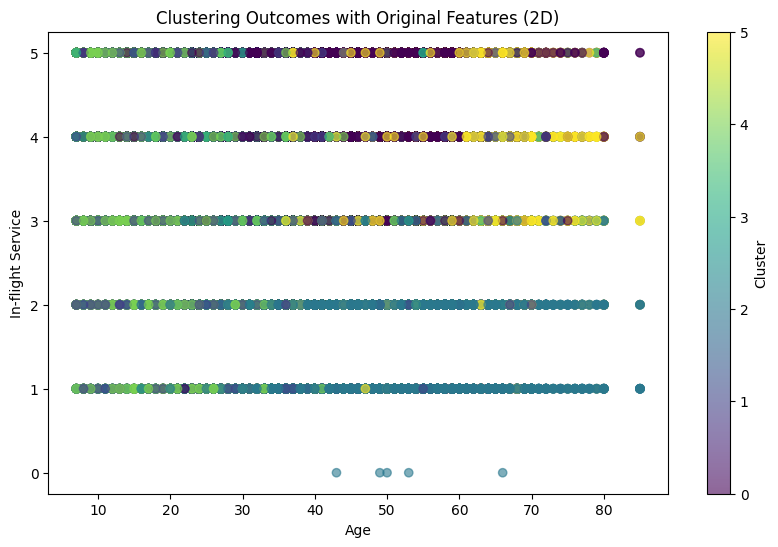

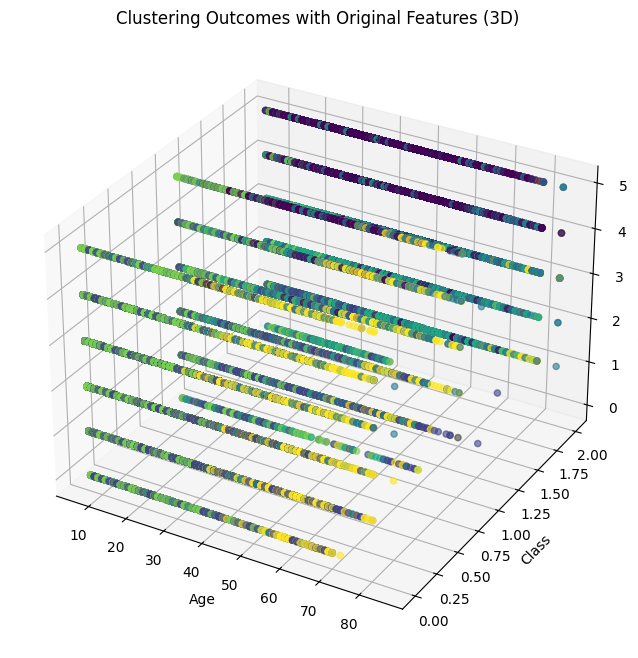

In [ ]:
# Visualization with Original Features in 2D and 3D
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 2D Visualization using Age and In-flight Service
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['In-flight Service'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('In-flight Service')
plt.title('Clustering Outcomes with Original Features (2D)')
plt.colorbar(label='Cluster')
plt.show()

# 3D Visualization using Age, Class, and Online Boarding
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Class'], df['Online Boarding'], c=df['Cluster'], cmap='viridis', alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Class')
ax.set_zlabel('Online Boarding')
ax.set_title('Clustering Outcomes with Original Features (3D)')
plt.show()

## Results Implementation and Summary

Based on the analysis of the airline passenger satisfaction dataset, we can draw the following conclusions:

1.) Key Factors Influencing Satisfaction:

- In-flight services: Factors like in-flight Wi-Fi, seat comfort, and online boarding significantly impact customer satisfaction.
- On-time performance: Departure and arrival delays negatively affect customer satisfaction.
- Baggage handling: Efficient baggage handling is crucial for a positive customer experience.
- Improvement in flight cleanliness.

2.) Model Performance:

- The Random Forest performed better than Logistic Regression and Decision Tree models in terms of overall accuracy, precision and AUC-ROC score, even without including hyperparameter tuning.
- However, all models showed immmaculate performance (very high accuracy and precision), indicating that there is a slight possibility that there is an overfitting.

3.) Recommendations:

- Prioritize In-flight Services: Invest in improving in-flight Wi-Fi, seat comfort, and food and beverage offerings to enhance customer satisfaction.
- Focus on On-time Performance: Implement strategies to minimize departure and arrival delays to improve customer experience and reduce negative sentiment.
- Optimize Baggage Handling: Streamline baggage handling processes to avoid delays and losses.
- Consider Ensemble Methods: Explore ensemble techniques like Gradient Boosting or XGBoost to potentially improve model performance.
- Feature Engineering: Create new features or transform existing ones to capture more relevant information.
- Continuous Monitoring: Monitor customer satisfaction metrics and model performance over time to identify emerging trends and adjust strategies accordingly.

4.) Marketing Strategies:

- Extra amenities and premium food options for business class travelers.
- Emphasize student discount for more young travelers engagement.
- Promote free-senior friendly services such as limited seat upgrade and boarding assistance.